In [1]:
import numpy as np 
import pandas as pd 
import xgboost
import shap 
from sklearn.model_selection import train_test_split
from shap.benchmark import SequentialPerturbation
from shap.benchmark import get_benchmark, trend_plot, compare_plot

In [2]:
# define metrics 
# sort order: positive, negative, absolute 
# perturbation: keep, remove
metrics = {'sort_order': ['positive', 'negative'], 'perturbation': ['keep', 'remove']}

In [3]:
# create trained model for prediction function 
untrained_model = xgboost.XGBRegressor(n_estimators=100, subsample=0.3)
X,y = shap.datasets.boston()
X = X.values

test_size = 0.3 
random_state = 0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

model = untrained_model.fit(X_train, y_train)

In [4]:
# default to dataset as the explainer masker 
explainer_masker = X

In [5]:
# explainers to compare 
permutation_explainer = shap.Explainer(model.predict, explainer_masker, algorithm='permutation')
tree_explainer = shap.Explainer(model, explainer_masker, algorithm='tree')
exact_explainer = shap.Explainer(model.predict, explainer_masker, algorithm='exact')

In [6]:
# impute values as the benchmark masker 
# using covariance to calculate imputed values for masking 
benchmark_masker = shap.maskers.Impute(X)

In [7]:
# create benchmarks for each explainer 
benchmarks = dict()
benchmarks[permutation_explainer.name] = get_benchmark(model.predict, X_train, y_train, permutation_explainer, benchmark_masker, metrics)
benchmarks[tree_explainer.name] = get_benchmark(model.predict, X_train, y_train, tree_explainer, benchmark_masker, metrics)
benchmarks[exact_explainer.name] = get_benchmark(model.predict, X_train, y_train, exact_explainer, benchmark_masker, metrics)

Permutation explainer: 355it [00:49,  7.20it/s]                                                                                                          


Permutation explainer: 355it [00:41,  8.48it/s]                                                                                                          


Permutation explainer: 355it [00:35,  9.88it/s]                                                                                                          


Permutation explainer: 355it [01:27,  4.06it/s]                                                                                                          


Exact explainer: 355it [22:10,  3.75s/it]                                                                                                                


Exact explainer: 355it [18:38,  3.15s/it]                                                                                                                


Exact explainer: 355it [20:42,  3.50s/it]                                                                                                                


Exact explainer: 355it [20:50,  3.52s/it]                                                                                                                


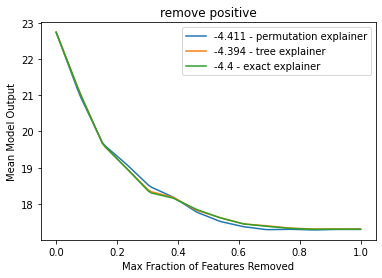

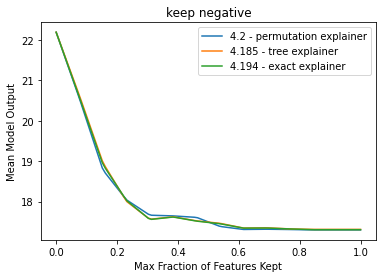

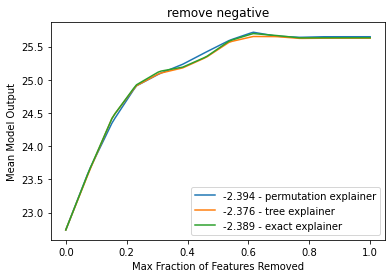

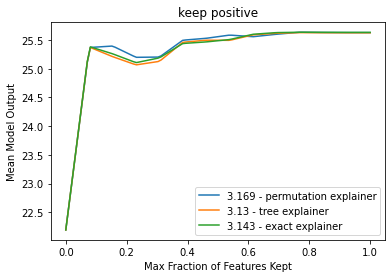

In [8]:
# trend of individual explainer with respect to specific metrics 
trend_plot(benchmarks)

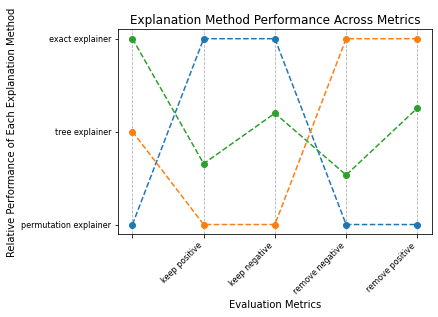

In [9]:
# compare explainer performance across different metrics 
# normalized between 0 and 1 for comparison 
compare_plot(benchmarks)